In [111]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [112]:
# Load the data
housing = pd.read_csv("D:/MI sklearn/dataset numerical/New folder/housing.csv")
# Display the data
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [114]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [115]:
housing = getOutliers(housing,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


In [116]:
# Check for missing values
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        196
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [117]:
# Assuming 'housing' is your DataFrame
print(housing.iloc[:, 4:5].head())

# Create a SimpleImputer object with strategy="median"
imputer = SimpleImputer(strategy="median")

# Fit and transform the imputer on the selected column
housing.iloc[:, 4:5] = imputer.fit_transform(housing.iloc[:, 4:5])

# Check for any remaining missing values
print(housing.isnull().sum())


   total_bedrooms
0           129.0
2           190.0
3           235.0
4           280.0
5           213.0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [118]:
housing 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [119]:
# Handle missing values in numerical features
# Handle missing values in numerical features
housing = housing.dropna(subset = ['total_bedrooms'])
print(housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [120]:
X = housing.drop("median_house_value",axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY


In [121]:
y = housing["median_house_value"]
y.head()

0    452600.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
Name: median_house_value, dtype: float64

In [122]:
#One Hot Encoding
df = pd.get_dummies(X['ocean_proximity'])
df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [123]:
# Concatenate the encoded categorical features with the numerical features
X = X.drop(["ocean_proximity"], axis=1)
X = pd.concat([X, df], axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [124]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000
mean,-119.591048,35.647446,29.522193,2225.118793,463.045368,1244.520384,433.455537,3.812732
std,2.000904,2.142796,12.308489,1153.906566,253.146946,711.481397,235.163940,1.883560
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.940000,19.000000,1406.000000,289.000000,766.000000,272.000000,2.527500
50%,-118.500000,34.260000,30.000000,2036.000000,416.000000,1118.000000,392.000000,3.481200
75%,-118.030000,37.720000,38.000000,2892.000000,592.000000,1591.000000,557.000000,4.668700
max,-114.310000,41.950000,52.000000,5694.000000,2610.000000,8733.000000,2406.000000,15.000100


In [125]:
#Split the dataset into 80% train and 20% test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
n_folds = 5  
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print(f'Cross-validated Mean Squared Error: {np.mean(-scores)}')


Cross-validated Mean Squared Error: 9852277463.67699


In [126]:
#Standardize training and test dataset
features_to_scale = ['total_rooms', 'total_bedrooms', 'population', 'households']
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16369,-121.31,38.01,22.0,0.310370,0.869190,0.174864,0.913027,1.4274,False,True,False,False,False
15148,-116.93,32.87,17.0,1.306499,0.829432,0.445988,0.737444,3.6027,True,False,False,False,False
17513,-121.92,37.33,52.0,-0.181180,-0.490533,-0.560246,-0.401711,5.5259,True,False,False,False,False
9386,-122.45,37.90,30.0,1.342106,1.016294,0.070048,0.857354,8.4888,False,False,False,True,False
11713,-120.15,39.15,25.0,-0.476458,-0.450775,-1.507784,-1.515170,5.7500,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11906,-117.39,33.97,48.0,-0.262816,-0.450775,-0.254183,-0.238974,3.4044,False,True,False,False,False
12734,-121.34,38.58,18.0,-0.509460,-0.927871,-0.898453,-0.872790,7.8031,False,True,False,False,False
5666,-118.29,33.72,25.0,0.218313,0.487513,0.015543,0.441949,3.1932,False,False,False,False,True
892,-121.94,37.53,33.0,-0.106492,-0.474630,-0.420492,-0.547317,5.7610,True,False,False,False,False


In [127]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1540,-122.03,37.86,29.0,0.661981,0.028115,-0.316755,0.049399,6.1120,False,False,False,True,False
19123,-122.65,38.24,24.0,-0.264058,-0.615663,-0.479386,-0.526084,4.9500,True,False,False,False,False
13999,-116.90,34.69,10.0,-1.649247,-1.417494,-1.650908,-1.614948,0.4999,False,True,False,False,False
18741,-122.35,40.57,18.0,-0.025025,0.078229,-0.570057,0.045258,1.6821,False,True,False,False,False
19936,-119.33,36.30,12.0,-0.071456,-0.453755,-0.348418,-0.356338,4.9464,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20457,-118.77,34.28,6.0,2.089302,1.909335,1.331148,1.941454,4.5458,True,False,False,False,False
5157,-118.28,33.95,40.0,-0.181514,0.263267,1.287972,0.347490,2.1437,True,False,False,False,False
4943,-118.28,34.02,46.0,-0.994915,-0.168488,0.366873,-0.273534,2.1382,True,False,False,False,False
19153,-122.71,38.34,23.0,0.420368,0.456015,0.342406,0.484116,3.1781,True,False,False,False,False


65.21900154495181
Mean Absolute Error:  49730.96055221311
Mean Squared Error:  4778744013.211187


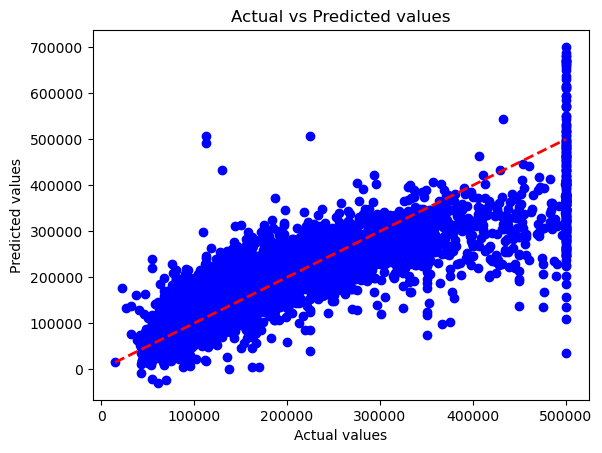

In [128]:
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

print(model.score(X_test,y_test) * 100)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",MAE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)

# Visualize the regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()



Score:  68.1376528851391
Mean Absolute Error:  44902.21090157583
Mean Squared Error:  4377735179.706969


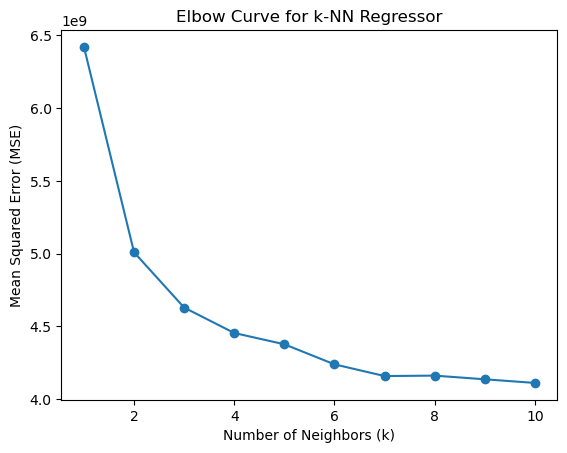

In [129]:
# knn model
knn = KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto')

# Fit the knn to the training data
knn.fit(X_train,y_train)

# Make predictions on the test set
y_pred=knn.predict(X_test)
print('Score: ',knn.score(X_test,y_test) * 100)
# Evaluate the model
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",MAE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)



mse_values = []

for k in range(1,11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o')
plt.title('Elbow Curve for k-NN Regressor')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()